### **This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.**
### **RainTomorrow is the target variable to predict. It means -- will it be rain the next day, Yes or No?**
### **This column is Yes if the rain for that day was 1mm or more.**
### **As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.**



In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
!pip install jovian --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00


In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
rainfall_df = pd.read_csv('/content/drive/MyDrive/Advertising/Rain/weatherAUS.csv')

In [5]:
rainfall_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### **Let's drop any rows where the value of the target column "RainTomorrow" is empty.**

In [7]:
rainfall_df.dropna(subset = ['RainTomorrow'], inplace = True)

## **Preparing the Data for Training**
### **We will perform the following steps to prepare the data for training:**
#### **1.Create a train, test and validation split.**
#### **2.Identify input and target columns**
#### **3.Identify numeric and categorical columns**
#### **4.Impute (fill) missing numeric values**
#### **5.Scale numeric values to the (0, 1) range**
#### **6.Encode categorical columns to one-hot vectors**

### **Training, Validation and Test Sets**

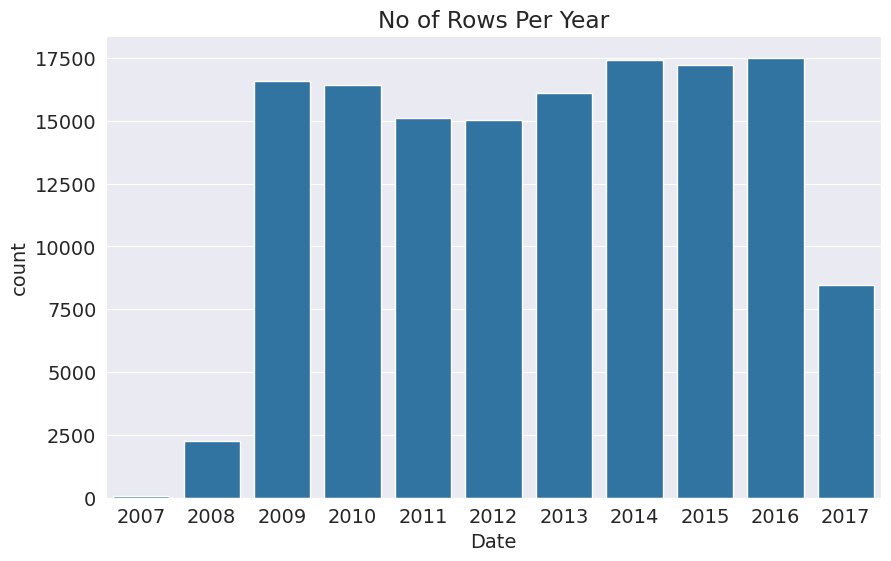

In [8]:
plt.title('No of Rows Per Year')
sns.countplot(x = pd.to_datetime(rainfall_df.Date).dt.year);

### **While working with chronological data, it is often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.**
### **We will use the data till 2014 for thev training set, data from 2015 for validation set, and the data from 2016 and 2017 for the test sets**

In [9]:
year = pd.to_datetime(rainfall_df.Date).dt.year

In [10]:
train_df = rainfall_df[year < 2015]
val_df = rainfall_df[year == 2015]
test_df = rainfall_df[year > 2015]

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (98988, 23)
val_df.shape: (17231, 23)
test_df.shape: (25974, 23)


### **Input and Target Columns**

In [11]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [12]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


### **We can now create the inputs and targets for the training set, validation set and test set for further processing and model training.**

In [13]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [14]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [15]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### **Let's also identify the numeric and categorical columns**

In [16]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [17]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [18]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### **Imputing Missing Numeric Columns**

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy = 'mean').fit(rainfall_df[numeric_cols])

In [21]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

### **To check if the missing values have been imputed**

In [22]:
test_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


### **Scaling Numeric Columns**

### **Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0, 1) range.**

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

### **First we fit the scaler to the data. i.e, compute the range of values for each numerid column.**

In [25]:
scaler.fit(rainfall_df[numeric_cols])

MinMaxScaler()

### **We can now separately scale the training, validation and test sets using the transform method of scaler**

In [26]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [27]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


In [28]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [29]:
test_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.016509,0.000000,0.000000,0.0,0.000000,0.007752,0.0,0.000000,0.04,0.03,0.024793,0.0000,0.000000,0.000000,0.000000,0.0
max,0.941038,0.984877,0.606469,1.0,0.972414,0.883721,1.0,0.747126,1.00,1.00,0.988430,0.9504,0.888889,0.888889,0.945148,1.0


### **Encoding Categorical Data**

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [32]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

### **First, we fit the encoder to the data. i.e, identify the full list of categories across all categorical columns**

In [33]:
encoder.fit(rainfall_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### **The encoder has created a list of categories for each of the categorical columns in the dataset.**
### **We can now generate column names for each individual category using get_feature_names**

In [34]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

### **All of the above columns will be added to train_inputs, val_inputs and test_inputs.**
### **To perform the encoding, we use the transform method of encoder**

In [35]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-35-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-35-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-35-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

### **As a final step, let's drop the textual categorical columns, so that we are left with just numerical data.**

In [36]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [37]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### **Training and Visualizing Decision Tree**

### **We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.**

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(random_state = 42)

In [40]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

### **An optimal decision tree has now been created using the training data**

In [41]:
train_preds = model.predict(X_train)

In [42]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
pd.value_counts(train_preds)

<ipython-input-43-5a0b2543de7a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


## **Evaluation**
### **Let's evaluate the decision tree using the accuracy score**

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

### **Predicted Values**

In [45]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### **Actual Values**

In [46]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [47]:
accuracy_score(train_preds, train_targets)

0.9999797955307714

### **The decision tree also returns probabilities for each prediction**

In [48]:
train_probs = model.predict_proba(X_train)

In [49]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### **Seems like the decision tree is quite confident about its predictions**
### **Let's check the accuracy of its predictions**

### **The training set accuracy is close to 100%. But we can't rely solely on training set accuracy. We must evaluate the model on validation set too.**
### **We can make predictions and compute the accuracy in one step using "model.score"**

In [50]:
model.score(X_val, val_targets)

0.791654576054785

### **Although the training accuracy is 100%, The accuracy on the validation set is just 79%, which is always marginally better than always predicting "No"**

In [51]:
val_targets.value_counts() / len(val_targets)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


### **It appears that this model has learnt the training examples perfectly. And it doesn't generalize to previously unseen data. This phenomenon is called "Overfitting". And reducing overfitting is one of the most important parts of any machine learning project**

### **Let's visualize the decision tree that learnt from the training data**

In [52]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

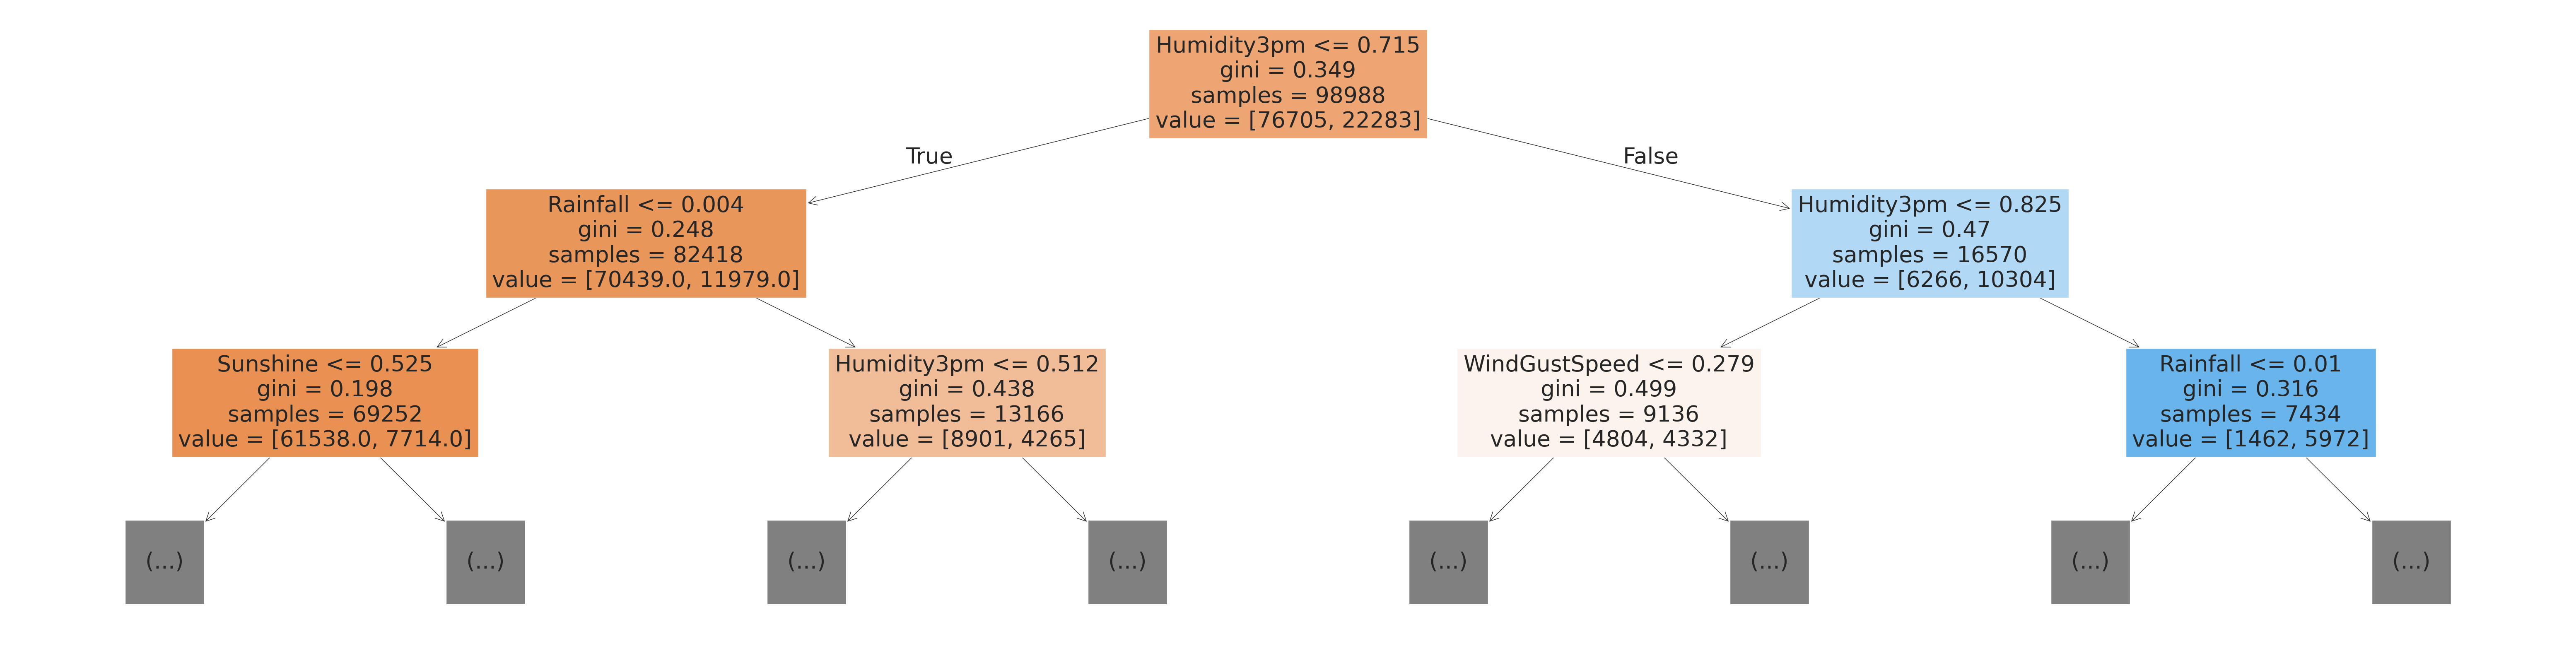

In [53]:
plt.figure(figsize = (80, 20))
plot_tree(model, feature_names = X_train.columns, max_depth = 2, filled = True)

### **Can you see how the model classifies a given input as a series of decision?**
### **Note the Gini value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data. And at what point the column should be split. A lower gini index indicates a better split.**

### **Let's check the depth of the tree that was created.**

In [54]:
model.tree_.max_depth

48

In [55]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

### **We can also display the as text, which can be easier to follow for deeper trees**

In [56]:
tree_text = export_text(model, max_depth = 10, feature_names = list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## **Feature Importance**
### **Based on the gini index computations, a decision tree assigns an "Importance" value to each feature. These values can be used to interpret the results given by a decision tree.**

In [57]:
model.feature_importances_

array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

### **Let's turn this into a dataframe and visualize the most important features**

In [58]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)


In [59]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.262586
11,Pressure3pm,0.062530
2,Rainfall,0.058871
5,WindGustSpeed,0.055365
4,Sunshine,0.049735
8,Humidity9am,0.039490
10,Pressure9am,0.034650
0,MinTemp,0.034502
14,Temp9am,0.033443
1,MaxTemp,0.032698


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

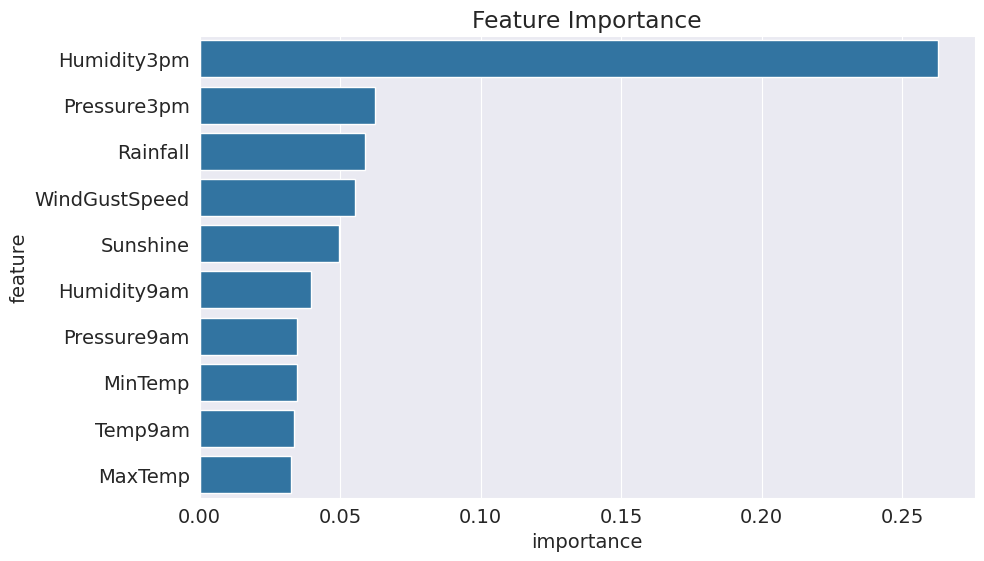

In [60]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x= 'importance', y = 'feature')

### **Hyperparameter Tuning and Overfitting**
### **We can see that the decision tree memorized all the training examples, leading to a 100% training accuracy. While the validation accuracy was only marginally better tha a dumb baseline model. This phenomenon is called "Overfitting". And we can reduce overfitting through a process known as "Regularization".**
### **The DecisionTreeClassifier accept several arguments, some of which can be modified to reduce ovefitting.**

### **These arguments are called hyperparameters, because they must be configured manually. These hyperparameters are:**
### **1.max_depth**
### **2.max_leaf_nodes**

### **max_depth:**
### **By reducing the maximum depth of a decision tree, we can prevent the tree from memorizind all training examples, which may lead to better generalization.**

In [61]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [62]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

### **We can compute the accuracy of the model on the training and validation sets using "model.score"**

In [63]:
model.score(X_train, train_targets)

0.8291308037337859

In [64]:
model.score(X_val, val_targets)

0.8334397307178921

### **The training accuracy of the model has gone down. While the validation accuracy of the model has increased significantly.**

In [65]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

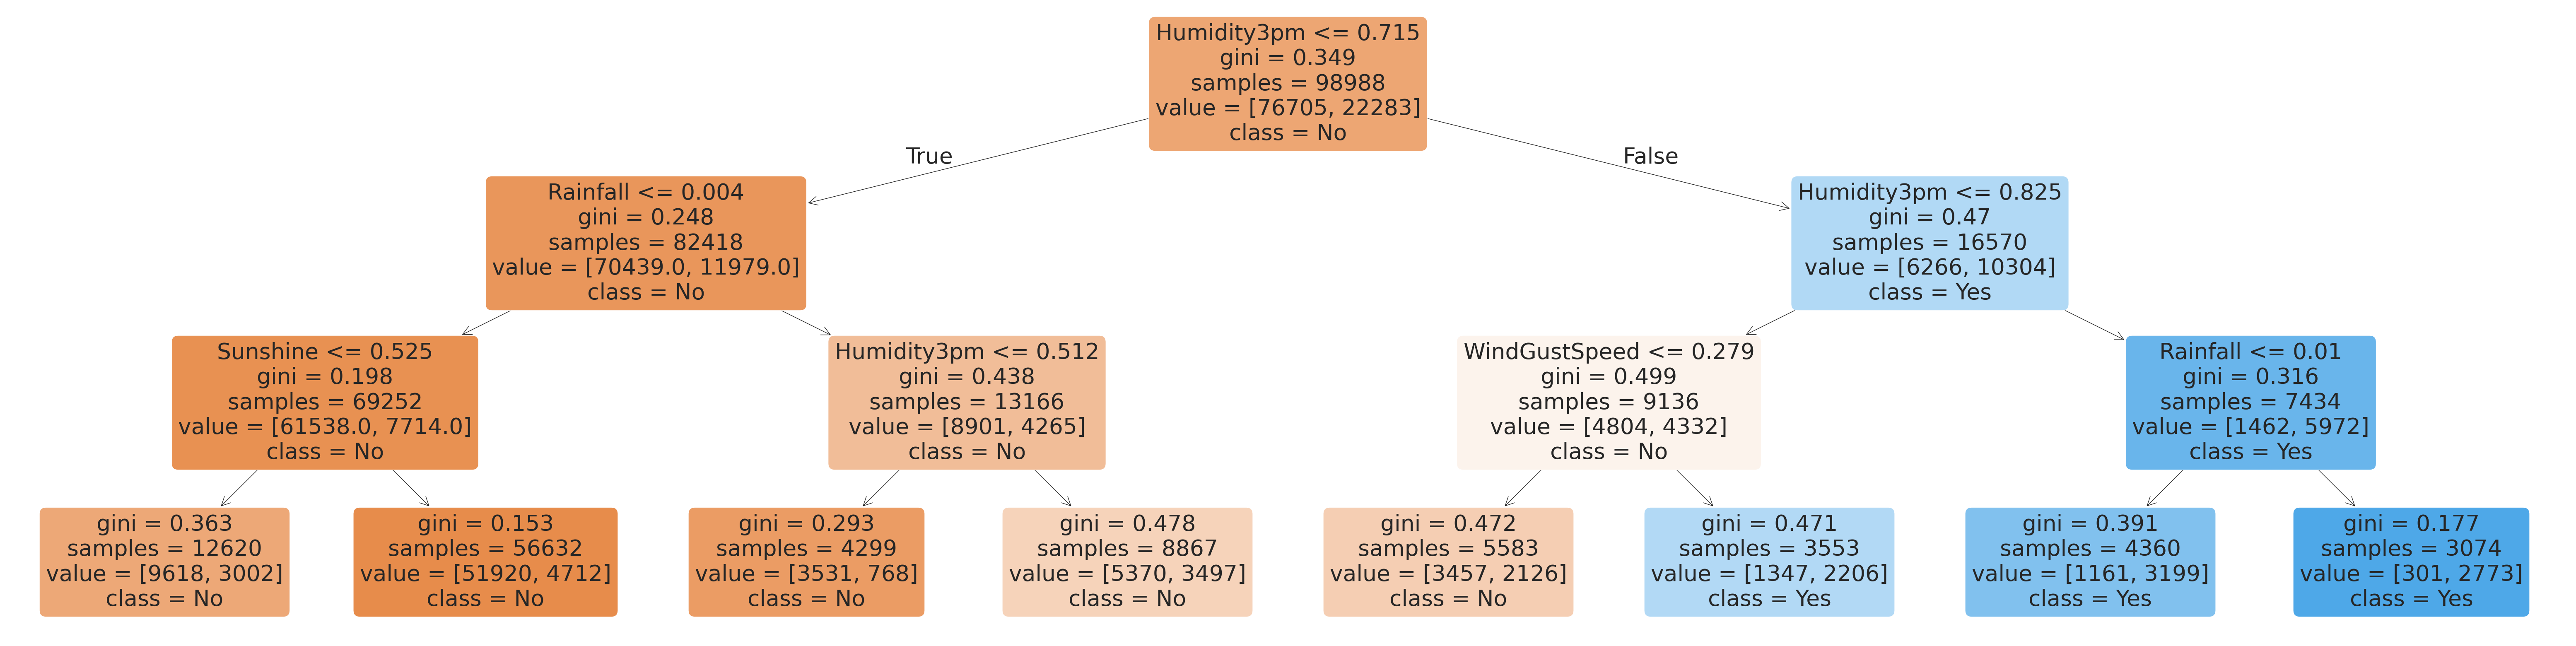

In [66]:
plt.figure(figsize = (80, 20))
plot_tree(model, feature_names = X_train.columns, filled = True, rounded = True, class_names = model.classes_)

In [67]:
print(export_text(model, feature_names = list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



### **Let's experiment with different depth using a helper function**

In [68]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth = md, random_state = 42)
  model.fit(X_train, train_targets)
  train_error = 1 - model.score(X_train, train_targets)
  val_error = 1 - model.score(X_val, val_targets)
  return {'max_depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [69]:
error_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [70]:
error_df

,max_depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140724,0.156346
9,10,0.132703,0.158319


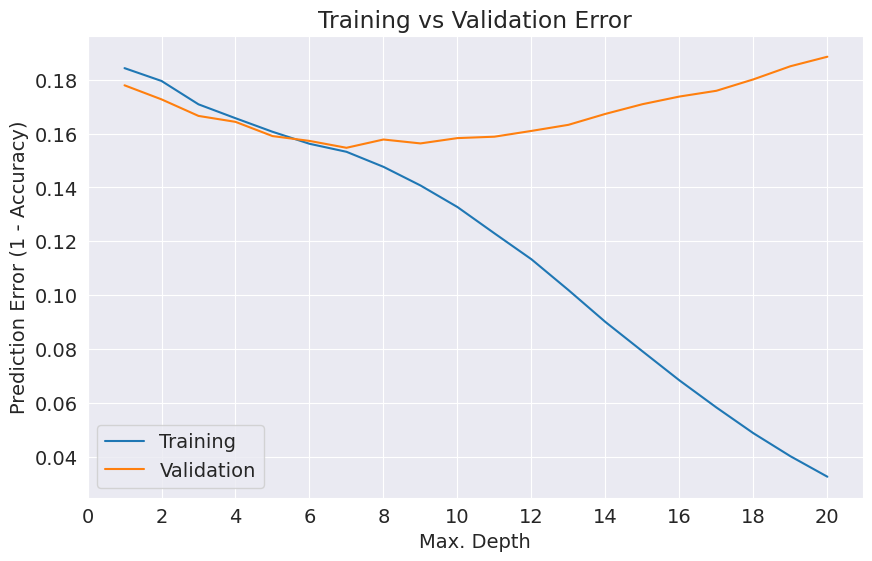

In [71]:
plt.figure()
plt.plot(error_df['max_depth'], error_df['Training Error']) # Use square brackets to access columns
plt.plot(error_df['max_depth'], error_df['Validation Error']) # Use square brackets to access columns
plt.title('Training vs Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

### **You will often need to tune hyperparameters carefully to find the optimal fit. It appers that a maximum depth of 7 results in lowest validation error.**

In [72]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 42).fit(X_train, train_targets)

In [73]:
model.score(X_val, val_targets)

0.8452788578724392

In [74]:
model.score(X_train, train_targets)

0.8467693053703479

### **max_leaf_nodes:**
### **Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows the branches of the tree to have varying depths**

In [75]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state = 42)

In [76]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [77]:
model.score(X_train, train_targets)

0.8480421869317493

In [78]:
model.score(X_val, val_targets)

0.8442342290058615

In [79]:
model.tree_.max_depth

12

### **Notice that the model was able to achieve a greater depth of 12 for certain paths. While keeping other paths shorter.**

In [80]:
model_text = export_text(model, feature_names = list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

### **Training a Random Forest**
### **While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a Random Forest Model.**
### **The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of there errors will cancel out. This idea is also commonly known as the "wisdom of the crowd"**

### **We will use the RandomForestClassifier class from sklearn.ensemble**

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)

### **n_jobs allows the random forest to use multiple parallel workers to train decision trees, and random_state = 42 ensures that we get the same results for each execution**

In [83]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [84]:
model.score(X_train, train_targets)

0.9999595910615429

In [85]:
model.score(X_val, val_targets)

0.8553769369160235

### **Once again the training accuracy is almost 100%. But this time validation accuracy is much better. Infact it is better than the best single decision tree we had trained so far.**
### **This general technique of combining the results of many models is called "ensembling". It works becuase most errors of individual model cancel out on averaging.**

### **We can also look at the probability for the predictions. The probability of a class is simply the fraction of trees that predicted the given class.**

In [86]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

### **We can access individual decision trees using "model.estimators_**

In [87]:
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]\nclass = Yes'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Pressure9am <= 0.718\ngini = 0.442\nsamples = 5221\nvalue = [5570.0, 2734.0]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Rainfall <= 0.003\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindDir9am_E <= 0.5\ngini = 0.201\nsamples = 41418\nvalue = [58053, 7422]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindGustSpeed <= 0.349\ngini =

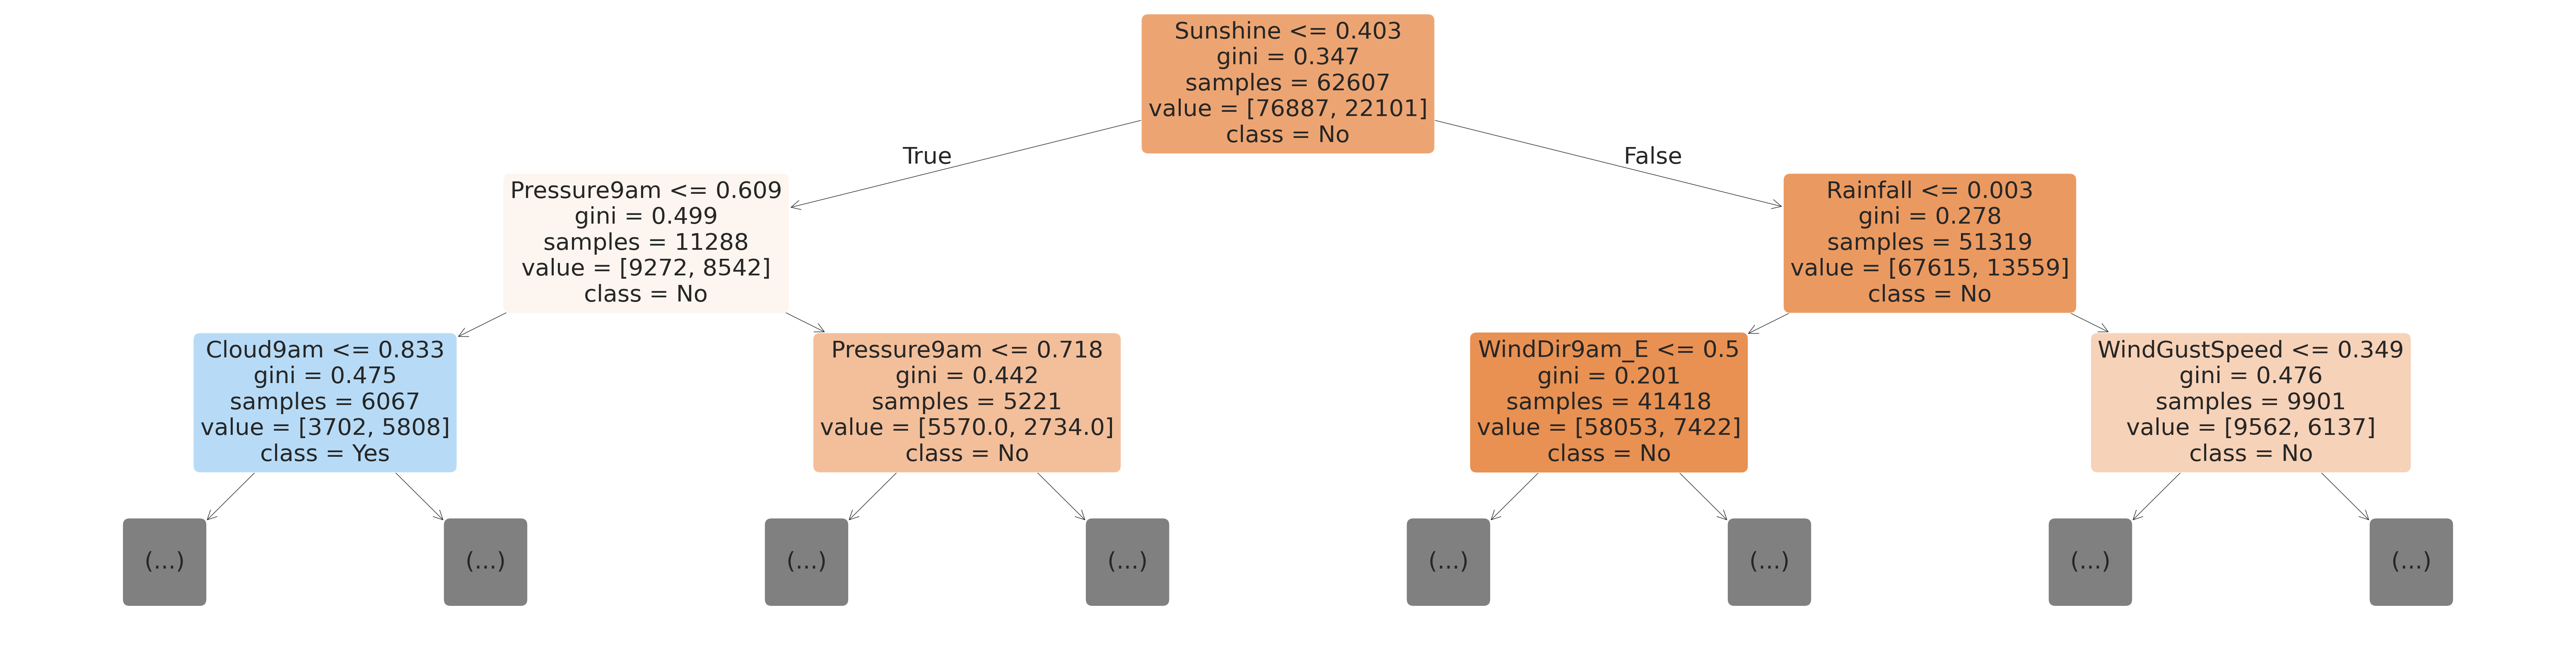

In [88]:
plt.figure(figsize = (80, 20))
plot_tree(model.estimators_[0], max_depth = 2, feature_names = X_train.columns, filled = True, rounded = True, class_names = model.classes_)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.349\nsamples = 62610\nvalue = [76714, 22274]\nclass = No'),
 Text(0.25, 0.625, 'WindGustDir_N <= 0.5\ngini = 0.262\nsamples = 48715\nvalue = [65024, 11930]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pressure3pm <= 0.505\ngini = 0.256\nsamples = 45275\nvalue = [60711, 10784]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.318\ngini = 0.332\nsamples = 3440\nvalue = [4313, 1146]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Location_Witchcliffe <= 0.5\ngini = 0.498\nsamples = 13895\nvalue = [11690, 10344]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Humidity9am <= 0.755\ngini = 0.497\nsamples = 13501\nvalue = [11440, 9917]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindDir3pm_

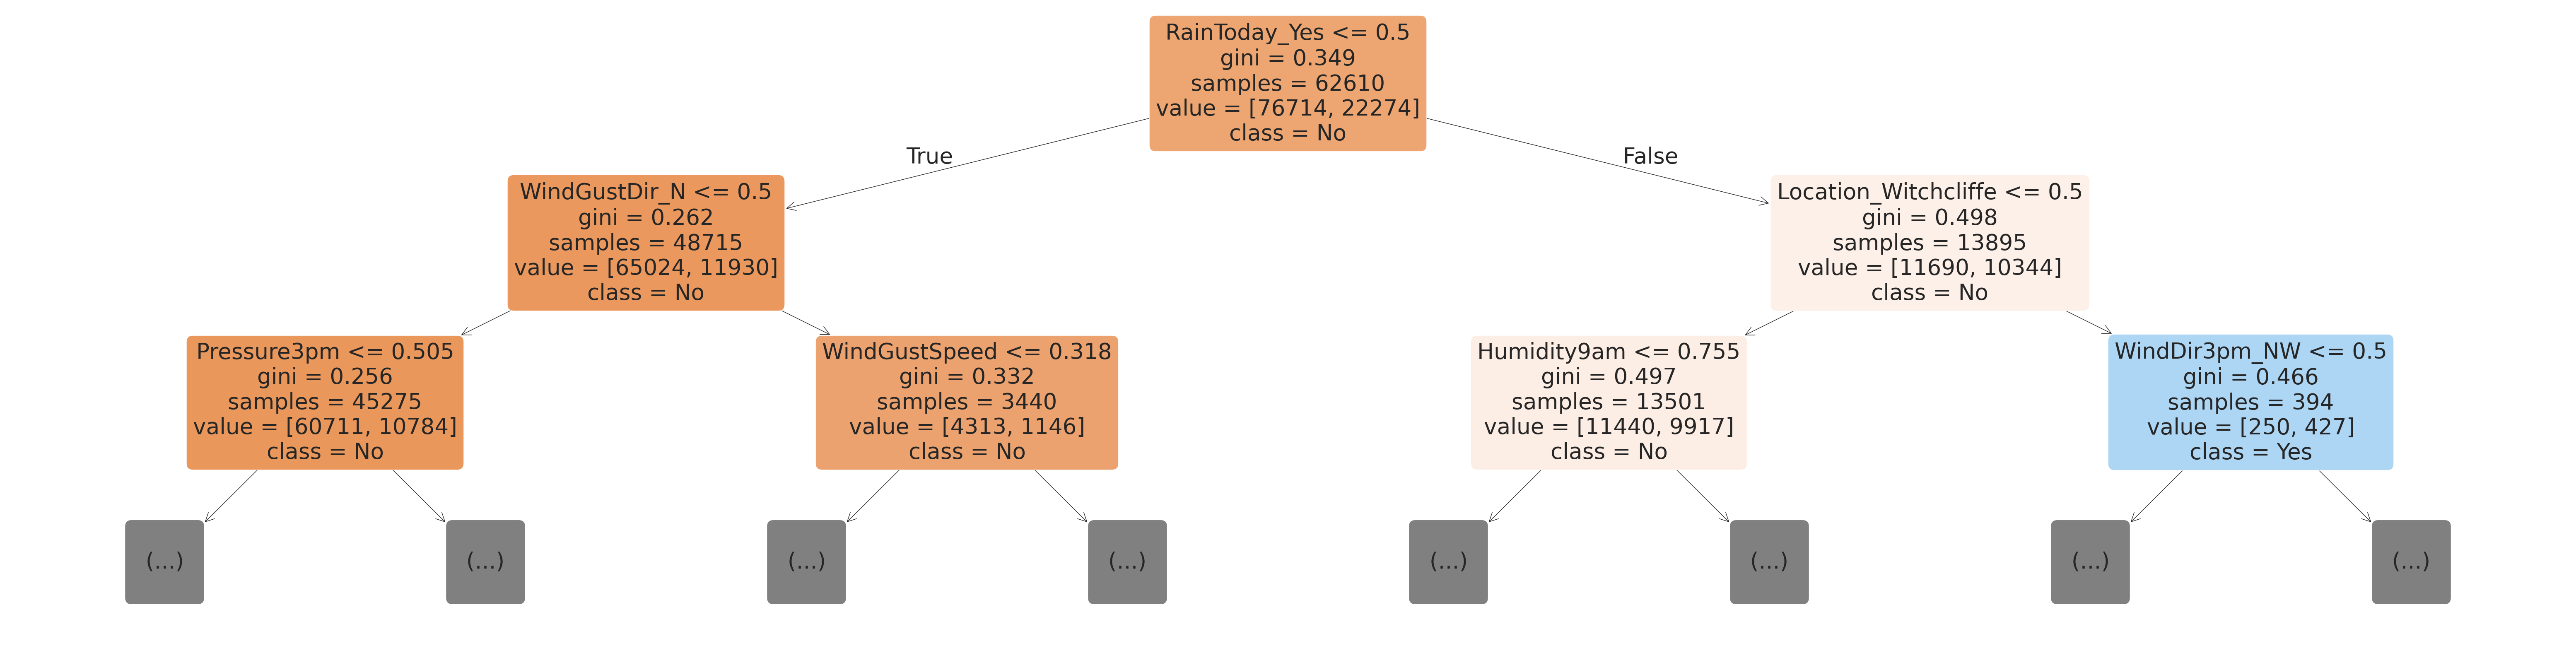

In [89]:
plt.figure(figsize = (80, 20))
plot_tree(model.estimators_[20], max_depth = 2, feature_names = X_train.columns, filled = True, rounded = True, class_names = model.classes_)

### **Just like a decision tree, random forests also assign an "Importance" to each feature, by combining the importance values from individual trees.**

In [90]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [91]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139391
4,Sunshine,0.055504
11,Pressure3pm,0.054219
8,Humidity9am,0.050754
10,Pressure9am,0.048210
5,WindGustSpeed,0.047833
2,Rainfall,0.047278
15,Temp3pm,0.045182
1,MaxTemp,0.041811
0,MinTemp,0.041537


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

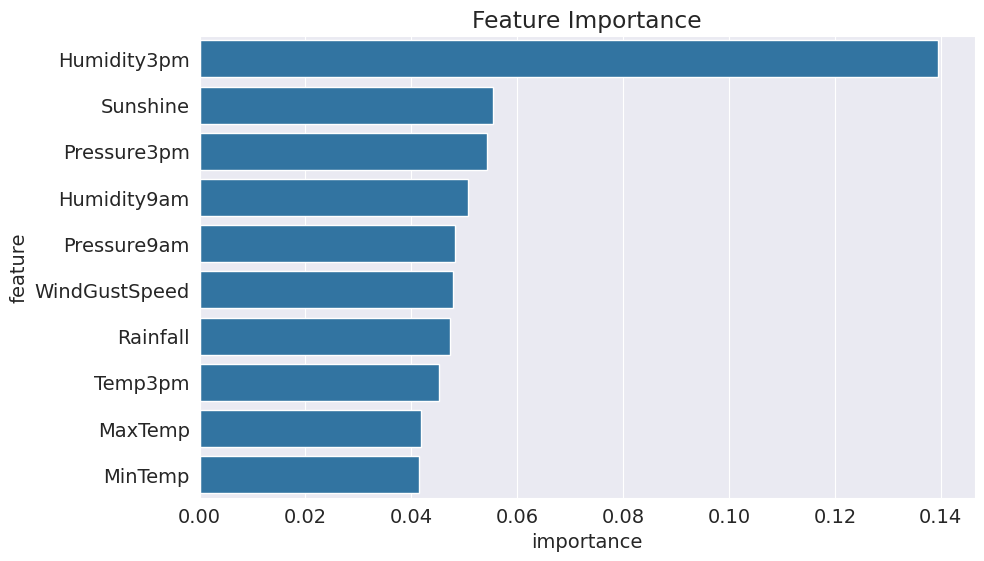

In [92]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x= 'importance', y = 'feature')

### **Notice that the distribution is a lot less skewed than that of a single decision tree**

### **Hyperparameter Tuning with Random Forest**

### **Let's create a base model with which we can compare models with tuned hyperparameters**

In [93]:
base_model = RandomForestClassifier(random_state = 42, n_jobs = -1,).fit(X_train, train_targets)

In [94]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [95]:
base_accs = base_train_acc, base_val_acc

In [96]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **n_estimators:**
### **This argument controls the number of decision trees in the random forest. The default value is 100. For large datasets, it helps to have a greater number of estimators**

In [97]:
# 10 estimators
model = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 10)

In [98]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [99]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9872105709783005, 0.8467297312982416)

In [100]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [101]:
# 500 estimators
model = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 500)

In [102]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [103]:
model.score(X_train, train_targets)

0.9999797955307714

In [104]:
model.score(X_val, val_targets)

0.8566537055307295

In [105]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **max_depth and max_leaf_nodes:**
### **These argumenrs are passed directly to each decision tree, and control the maximum depth and max. no of leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.**

### **Let's define a helper function "test_params" to make it easy to test hyperparameters.**

In [106]:
def test_params(**params):
  model = RandomForestClassifier(random_state = 42, n_jobs = -1, **params).fit(X_train, train_targets)
  return model.score(X_train, train_targets), model.score(X_val, val_targets)

### **Let's test a few values of "max_depth" and "max_leaf_nodes"**

In [107]:
test_params(max_depth = 5)

(0.8209681981654342, 0.8250826997852707)

In [108]:
test_params(max_depth = 26)

(0.9816543419404372, 0.8567697754047937)

In [109]:
test_params(max_leaf_nodes = 2**5)

(0.8303127651836586, 0.8323370669142824)

In [110]:
test_params(max_leaf_nodes = 2**20)

(0.9999595910615429, 0.8572920898380825)

In [111]:
base_accs # no of max depth nodes

(0.9999595910615429, 0.8553769369160235)

### **The optimal values of "max_depth" and "max_leaf_nodes" lies somewhere btw 0 and unbounded.**

### **max_features:**
### **Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.**

In [112]:
test_params(max_features = 'log2')

(0.9999494888269285, 0.8540421333642852)

In [113]:
test_params(max_features = 3)

(0.9999393865923142, 0.8527653647495792)

In [114]:
test_params(max_features = 6)

(0.9999494888269285, 0.8540421333642852)

In [115]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **min_samples_split and min_samples_leaf:**
### **By default, a decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behaviour and reduce overfitting, especially for very large datasets.**

In [116]:
test_params(min_samples_split = 3, min_samples_leaf = 2)

(0.9620155978502445, 0.8549706923567988)

In [117]:
test_params(min_samples_split = 100, min_samples_leaf = 60)

(0.8489311835778074, 0.8448145783761825)

In [118]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **Find the optimal values of min_samples_split and min_samples_leaf**

### **min_impurity_decrease:**
### **This argument is used to control the threshold of splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. Its default value is 0, and you can increase it to reduce overfitting.**


In [119]:
test_params(min_impurity_decrease = 1e-6)

(0.9885541681820018, 0.8560153212233764)

In [120]:
test_params(min_impurity_decrease = 1e-2)

(0.774891906089627, 0.7882885497069235)

In [121]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **bootstrap, max_samples:**
### **By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e some rows may not show up at all, while some rows may show up multiple times.**

In [122]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8586268933898207)

In [123]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **When bootsrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using "max_samples". This can further generalize the model.**

In [124]:
test_params(max_samples = 0.9)

(0.9997575463692568, 0.8560153212233764)

In [125]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **class_weight**

In [126]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [127]:
test_params(class_weight = 'balanced')

(0.9999595910615429, 0.8552608670419592)

In [128]:
test_params(class_weight = {'No': 1, 'Yes': 2})

(0.9999393865923142, 0.8554349718530555)

In [129]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **Find the optimal value of "class_weight" for this dataset.**

### **Putting it together:**
### **Let's train a random forest with customized hyperparameters based on our learnings.**

In [130]:
model = RandomForestClassifier(n_jobs = 1,
                               random_state = 42,
                               n_estimators = 500,
                               max_features = 7,
                               max_depth = 30,
                               class_weight = {'No': 1, 'Yes': 1.5})

In [131]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=1,
                       random_state=42)

In [132]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9916757586778195, 0.85694388021589)

In [133]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### **We have increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not see a significant improvement with hyperparameter tuning.**

### **Finally, let's compute the accuracy for our model on the test set**

In [134]:
model.score(X_test, test_targets)

0.8452683452683453

### **Notice that the test accuracy is lower**

### **Making predictions on new inputs**

In [138]:
def predict_input(model, single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
  return pred, prob

### **We can now use this functions to make predictions for individual inputs.**

In [139]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [140]:
predict_input(model, new_input)

<ipython-input-138-a17fcacc616c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
<ipython-input-138-a17fcacc616c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
<ipython-input-138-a17fcacc616c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

('Yes', np.float64(0.7430748803824485))

### **Saving and Loading Trained Models:**

### **We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it is also important to imputers,scalers and encoders, and even column names.**

### **We can use joblib module to save and load python object on the disk.**

In [141]:
import joblib

### **Let's first create a dictionary containing all the required objects:**

In [142]:
australia_weather = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

### **We can now save this to a file using joblib.dump**

In [145]:
joblib.dump(australia_weather, 'australia_weather.joblib')

['australia_weather.joblib']

### **The object can be loaded back using joblib.load**

In [146]:
australia_weather2 = joblib.load('australia_weather.joblib')

In [147]:
australia_weather2['model']

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=1,
                       random_state=42)

### **Let's use the loaded model to make predictions on the original test set**

In [148]:
test_preds2 = australia_weather2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8452683452683453

### **As expected we get the same result as original model**